In [37]:
%matplotlib inline
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import matplotlib
import matplotlib.pyplot as plt
import os
# Make plots bigger
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

# Working with time Series
We first download the data with our api key.

In [38]:
ts = TimeSeries(key=os.environ['API_KEY'], output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='compact')
# We can describe it
data.describe()

http://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=MSFT&interval=1min&outputsize=compact&apikey=486U&datatype=pandas


,open,high,low,close,volume
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,81.958192,81.982313,81.931302,81.956732,26631.49000
std,0.146057,0.142127,0.148394,0.146537,19080.62736
min,81.640000,81.660000,81.620000,81.635000,4780.00000
25%,81.857500,81.880000,81.817500,81.863750,15328.25000
50%,81.970000,81.990000,81.935000,81.962500,20815.00000
75%,82.090000,82.110000,82.070000,82.091250,31561.00000
max,82.160000,82.206600,82.140000,82.170000,124593.00000


Check the meta data given back by the api call.

In [39]:
meta_data

{'1. Information': 'Intraday (1min) prices and volumes',
 '2. Symbol': 'MSFT',
 '3. Last Refreshed': '2017-12-05 15:13:00',
 '4. Interval': '1min',
 '5. Output Size': 'Compact',
 '6. Time Zone': 'US/Eastern'}

In [40]:
ts = TimeSeries(key=os.environ['API_KEY'], output_format='csv')
data_csv,_ = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='compact')
data_csv

http://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=MSFT&interval=1min&outputsize=compact&apikey=486U&datatype=csv


## Plotting time series

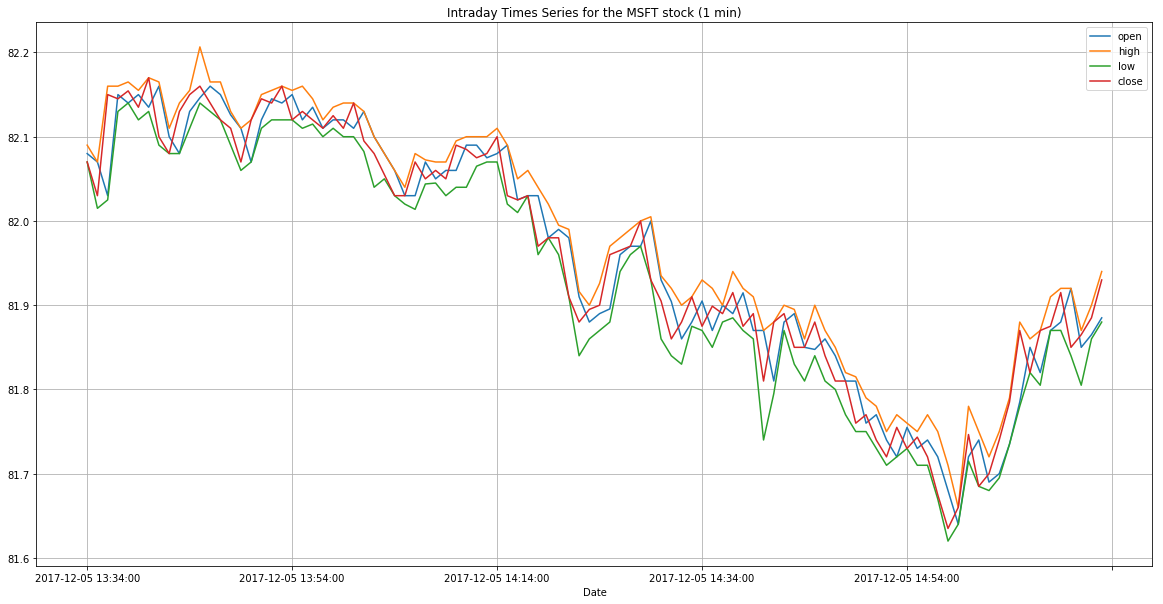

In [42]:
data = data.drop('volume',1)
data.plot()
plt.title('Intraday Times Series for the MSFT stock (1 min)')
plt.grid()
plt.show()

# Working with technical indicators

In [43]:
ti = TechIndicators(key=os.environ['API_KEY'], output_format='pandas')
data, meta_data = ti.get_bbands(symbol='MSFT', interval='60min', time_period=60)
data.describe()

http://www.alphavantage.co/query?function=BBANDS&symbol=MSFT&interval=60min&time_period=60&series_type=close&apikey=486U


,Real Middle Band,Real Lower Band,Real Upper Band
count,7.000000,7.000000,7.000000
mean,83.561114,81.854443,85.267743
std,0.057579,0.152082,0.037220
min,83.477200,81.636100,85.209600
25%,83.522850,81.753000,85.245750
50%,83.563400,81.857200,85.269500
75%,83.601800,81.957800,85.292650
max,83.637900,82.066200,85.318300


In [44]:
meta_data

{'1: Symbol': 'MSFT',
 '2: Indicator': 'Bollinger Bands (BBANDS)',
 '3: Last Refreshed': '2017-12-05 15:00:00',
 '4: Interval': '60min',
 '5: Time Period': 60,
 '6.1: Deviation multiplier for upper band': 2,
 '6.2: Deviation multiplier for lower band': 2,
 '6.3: MA Type': 0,
 '7: Series Type': 'close',
 '8: Time Zone': 'US/Eastern Time'}

## Plotting technical indicators

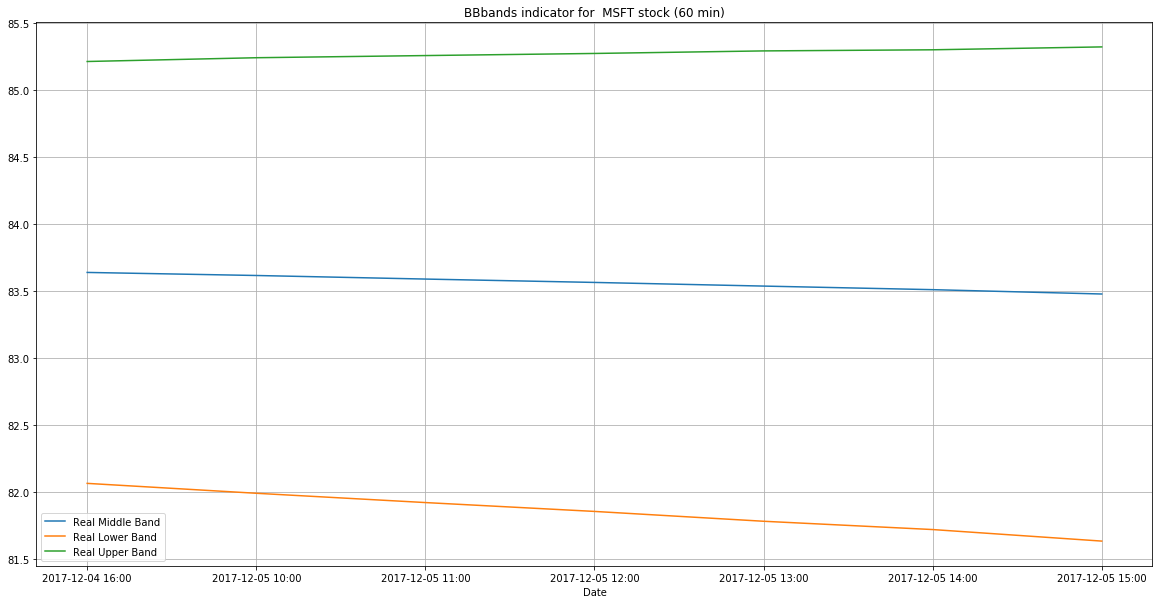

In [45]:
data.plot()
plt.title('BBbands indicator for  MSFT stock (60 min)')
plt.grid()
plt.show()

# Working with Sector Performance

In [46]:
sp = SectorPerformances(key=os.environ['API_KEY'], output_format='pandas')
data, meta_data = sp.get_sector()
data.describe()

http://www.alphavantage.co/query?function=SECTOR&apikey=486U


,Rank A: Real-Time Performance,Rank B: Day Performance,Rank C: Day Performance,Rank D: Month Performance,Rank E: Month Performance,Rank F: Year-to-Date (YTD) Performance,Rank G: Year Performance,Rank H: Year Performance,Rank I: Year Performance,Rank J: Year Performance
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,10.000000,10.000000,10.00000
mean,-0.005091,0.001800,0.023218,0.029136,0.056964,0.129664,0.157855,0.219850,0.750200,0.72691
std,0.005219,0.012534,0.034712,0.035324,0.040826,0.125392,0.120545,0.195508,0.458129,0.69597
min,-0.015000,-0.019300,-0.039000,-0.025900,0.004000,-0.092900,-0.061400,-0.149700,-0.026200,-0.08980
25%,-0.006450,-0.009100,0.001850,0.009000,0.022050,0.083200,0.121650,0.164600,0.584475,0.17105
50%,-0.003800,0.008400,0.031700,0.011800,0.066500,0.160700,0.192800,0.204000,0.803950,0.61005
75%,-0.003100,0.010700,0.036550,0.054550,0.080500,0.196800,0.204000,0.347900,1.073350,1.17835
max,0.003400,0.015900,0.079900,0.097600,0.130300,0.335400,0.381400,0.538300,1.327700,1.85590


In [47]:
meta_data

{'Information': 'US Sector Performance (realtime & historical)',
 'Last Refreshed': '03:04 PM ET 12/05/2017'}

## Plotting Sector Performance

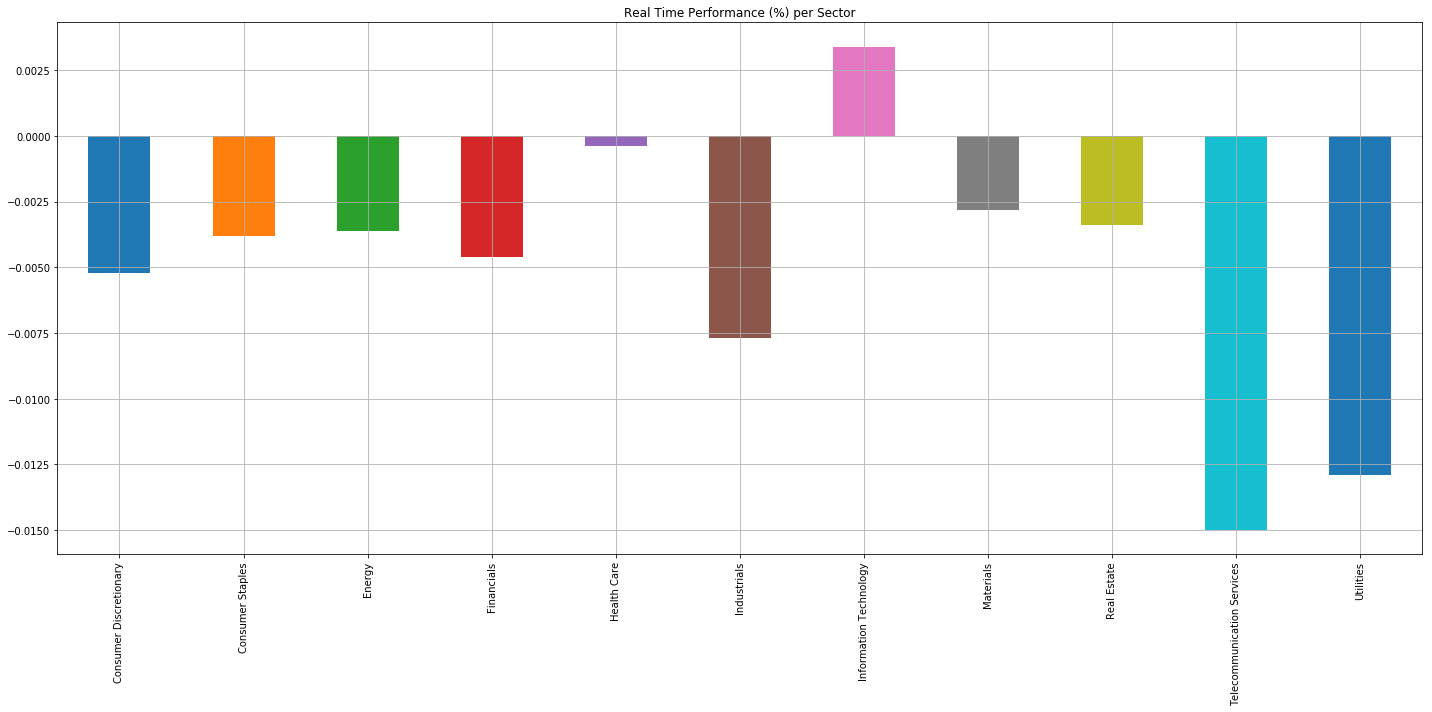

In [48]:
data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Real Time Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show()

# Working with Crypto Currencies

To just get the current exchange rate

In [50]:
cc = CryptoCurrencies(key=os.environ['API_KEY'])

To get the intraday price of bitcoin 

In [51]:
# I changed the internal format of the the class to be our friendly data frame.
cc.output_format='pandas'
data, meta_data = cc.get_digital_currency_intraday(symbol='BTC', market='CNY')
data.describe()

http://www.alphavantage.co/query?function=DIGITAL_CURRENCY_INTRADAY&symbol=BTC&market=CNY&apikey=486U&datatype=pandas


,. price (CNY),. price (USD),volume,market cap (USD)
count,923.000000,923.000000,923.000000,923.000000
mean,74057.940794,11190.698463,0.354738,3985.375858
std,2306.052511,347.316019,0.170228,1955.120481
min,69543.091765,10508.491004,0.173610,1897.104610
25%,71768.963411,10848.115634,0.206495,2336.439370
50%,74689.426906,11283.242980,0.264640,3001.016204
75%,76140.170796,11496.851178,0.581200,6646.907981
max,77739.714770,11756.123031,0.606050,6951.223096


In [52]:
data.head(5)

,. price (CNY),. price (USD),volume,market cap (USD)
Date,,,,
2017-12-02 15:25:00,72750.51829,10996.480893,0.20568,2261.75619
2017-12-02 15:30:00,72750.51829,10996.480893,0.20568,2261.75619
2017-12-02 15:35:00,72750.51829,10996.480893,0.20568,2261.75619
2017-12-02 15:40:00,72750.51829,10996.480893,0.20568,2261.75619
2017-12-02 15:45:00,72750.51829,10996.480893,0.20568,2261.75619


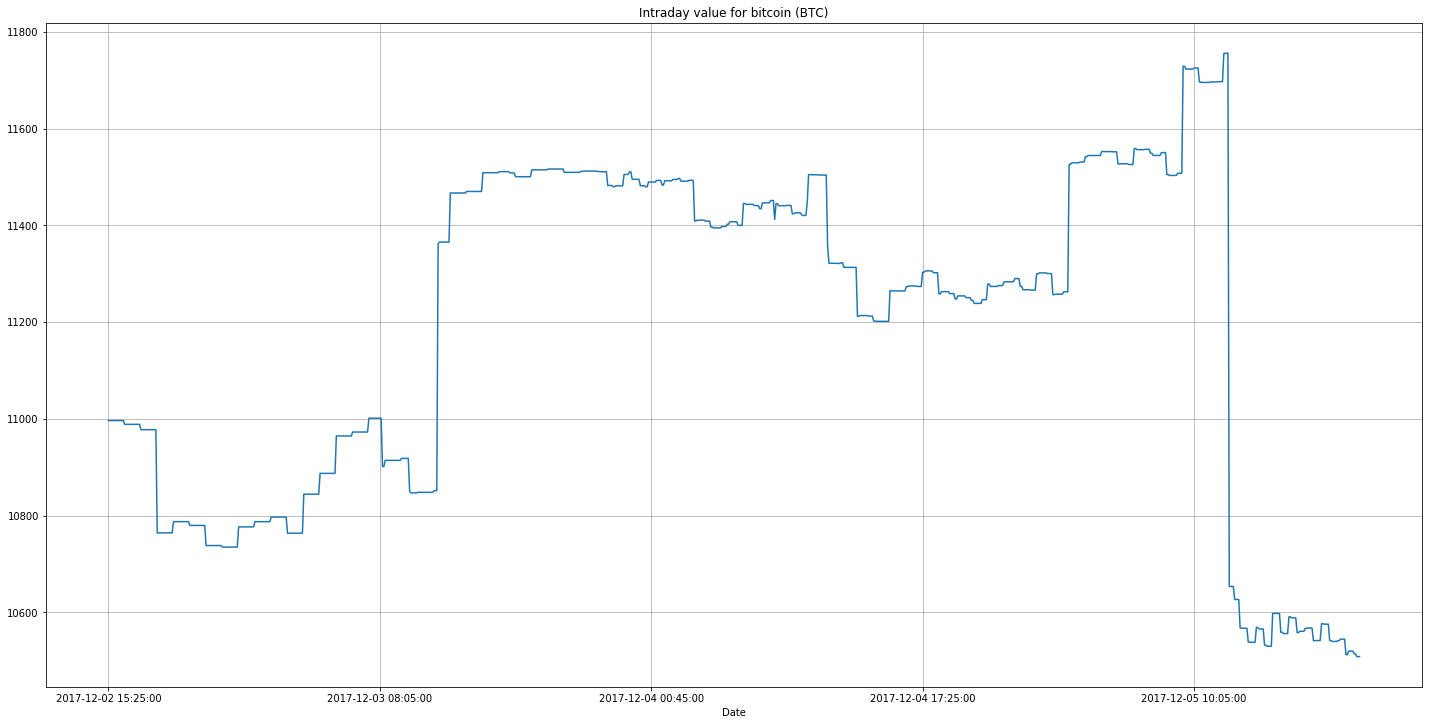

In [53]:
data['. price (USD)'].plot()
plt.tight_layout()
plt.title('Intraday value for bitcoin (BTC)')
plt.grid()
plt.show()